# Linear Regression using multiple variables

In [2]:
import helpers as hlp
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Configuration

In [3]:
# Configuration Parameters
learning_rate = 0.00001
epochs = 10000
display_step = 100
display_step_num = int(np.floor(epochs/display_step)) + 1  # +1 to include the very first step

## Import Data

In [5]:
# Import data
train_data = np.loadtxt(
    "../../../data/ex1/ex1data2.txt", dtype="float64", delimiter=",")
train_x_unbiased = np.delete(train_data, -1, axis=1)
train_x = np.insert(train_x_unbiased, 0, 1, axis=1)
train_y = np.delete(train_data, np.s_[:-1], axis=1)

## Visualize Data

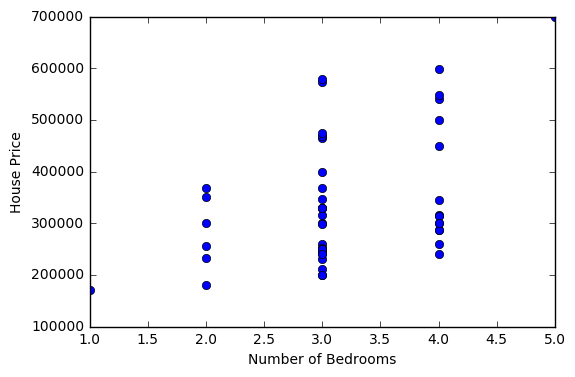

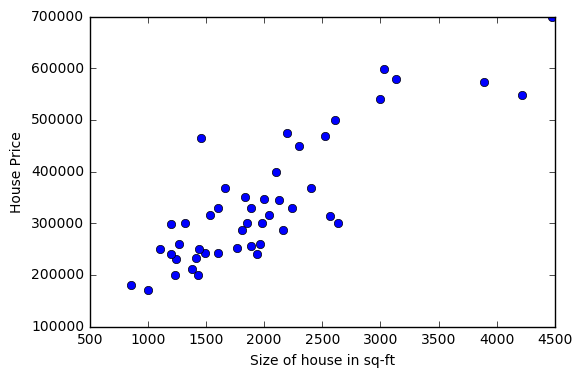

In [5]:
# Visualize Data
labels = {
    "figure_labels": [
        "House Price Prediction - number of bedrooms",
        "House Price Prediction - sq-ft"
    ],
    "x_labels": [
        "Number of Bedrooms", 
        "Size of house in sq-ft"],
    "y_label": "House Price"
}

hlp.plot_unclassified_data(train_x_unbiased, train_y, **labels)

## Preprocess Data

In [6]:
# Normalize Features
train_x, mu, sigma = hlp.normalize_features(train_x)

## Define Model

In [7]:
# Parameters
x = tf.placeholder(tf.float64, name="x")
y = tf.placeholder(tf.float64, name="y")
m = train_y.shape[1]  # number of training examples

# Model
theta = tf.Variable(
    tf.zeros(
        (train_x.shape[1], 1), dtype=tf.float64), name="theta")
prediction = tf.matmul(x, theta)

# Cost Function
cost = tf.reduce_sum(1 / 2 * m * tf.pow(tf.subtract(prediction, y), 2))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Initialization

In [8]:
# Initialize Session
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

file_writer = tf.summary.FileWriter("logs/multi/run1", sess.graph)

## Run Model

In [9]:
costs = np.zeros(display_step_num)
cost_indices = np.zeros(display_step_num)

for epoch in range(epochs):
    sess.run(optimizer, feed_dict={x: train_x, y: train_y})

    if epoch % display_step == 0:
        display_step_cur_num = int(epoch / display_step)
        costs[display_step_cur_num] = cost.eval(
            feed_dict={x: train_x,
                       y: train_y})
        cost_indices[display_step_cur_num] = epoch

costs[display_step_num - 1] = cost.eval(feed_dict={x: train_x, y: train_y})
cost_indices[display_step_num - 1] = epochs - 1

## Plot Cost Function

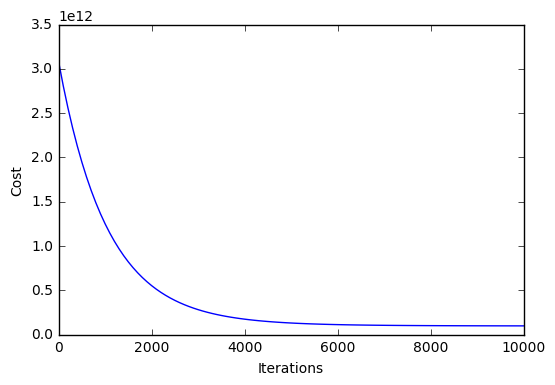

In [10]:
plt.figure("Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost")

plt.plot(cost_indices, costs)
plt.show()

## Results

In [11]:
print("Theta: \n" + str(theta.eval()) + "\n")
print("Final Cost: \n" + str(cost.eval(feed_dict={x: train_x, y: train_y})))

Theta: 
[[ 337319.93061708]
 [ 102081.84765184]
 [    720.46060166]]

Final Cost: 
97370940669.6


## Close Session

In [12]:
sess.close()